<a href="https://colab.research.google.com/github/MariaSuarezL/ModeladoSimulacion/blob/main/Tarea_4_Modelado_y_simulacion_Metodos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías 

In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math 
from matplotlib.axis import XAxis
from re import X

# Metodo de Heun 



In [28]:
def Heun(f,a,b,y0,n):
  # f es la función 
  # a y b son los extremos derecho e izquierdo del intervalo
  # y0 condición inicial 
  # n es el número de pasos
  t=np.linspace(a,b,n);
  h=t[2]-t[1];
  y = np.zeros(t.size);
  y[0]=y0;
  
  for i in range(1, t.size):
      y_intermediate = y[i-1] + h*f(t[i-1],y[i-1])
      y[i] = y[i-1] + (h/2.0)*(f(t[i-1],y[i-1]) + f(t[i],y_intermediate))
  return t,y

#Metodos de Runge Kutta 

Es un método que se aplica en la solución de ecuaciones diferenciales ordinarias, si bien el método tiene diferentes grados en el presente trabajo nos centraremos en el cuarto grado. Así las cosas, el método consiste en aproximar mediante cuatro pendientes la solución analítica de la ecuación diferencial.

**Descripción geométrica del método**

Como ya se menciona el método utiliza cuatro pendientes para aproximarse a la solución analítica, a continuación, se describen las pendientes:

**Primer pendiente**

La primer pendiente $m_1$ se calcula en el punto $(Xn,Yn)$, el valor que toma está pendiente es el incremento en Y que es igual a $K1$, sobre el incremento en $X$. De manera gráfica tenemos , la ecuación que resulta es:

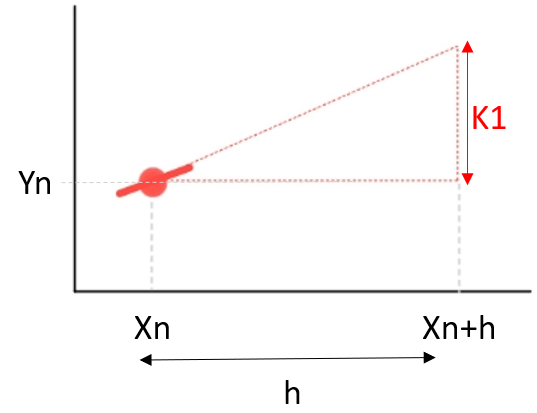

\begin{equation}
m_1=f(X_n ,Y_n)=\frac{K_1}{h}
\end{equation}

**Segunda pendiente**

La segunda pendiente $m2$ se calcula en el punto medio del incremento h, y el punto medio del incremento $K1$. Lo anterior corresponde a la coordenada $(X_n+\frac{h}{2},Y1+\frac{k1}{2})$. La pendiente en este punto toma el valor del incremento en Y, que corresponde a $K2$ , sobre el incremento en $X$, que corresponde nuevamente a $h$. De manera gráfica tenemos, la ecuación que resulta es:

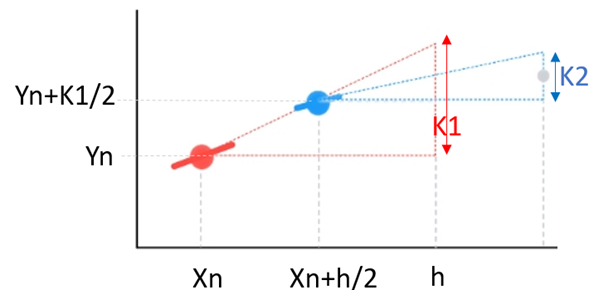


\begin{equation}
{m_2=f(X_n+\frac{h}{2},Y_n+\frac{K_1}{2})=\frac{K_2}{h}}
\end{equation}

**Tercer pendiente**

La tercer pendiente $m3$ se calcula en la coordenada $(Xn+\frac{h}{2},Yn+\frac{k2}{2})$. La pendiente en este punto toma el valor del incremento en $Y$ , que corresponde a $K3$ , sobre el incremento en $X$, que corresponde nuevamente a $h$. De manera gráfica tenemos, la ecuación que resulta es:

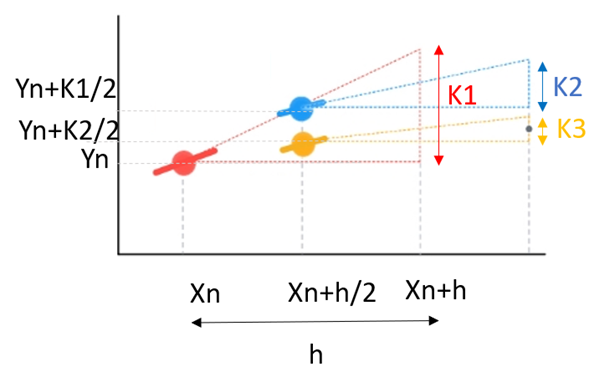

\begin{equation}
{m_3=f(X_n+\frac{h}{2},Y_n+\frac{K_2}{2})=\frac{K_3}{h}}
\end{equation}

Cuarta pendiente

La cuarta pendiente se calcula en el incremento $h$, y el incremento $K3$. Lo anterior corresponde a la coordenada $(Xn+h,Yn+K3)$. La pendiente en este punto toma el valor del incremento en $Y$ , que corresponde a $K4$ , sobre el incremento en $X$, que corresponde nuevamente a h. De manera gráfica tenemos  , la ecuación que resulta es:


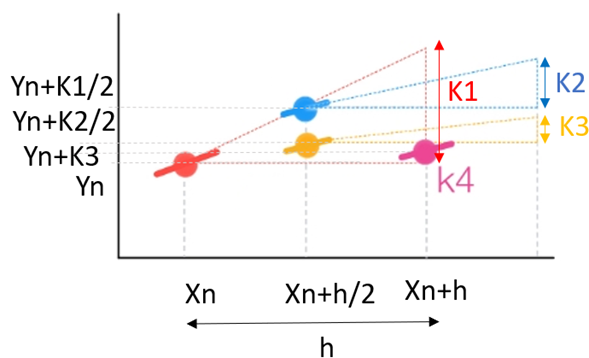

\begin{equation}
m_4=f(X_n+h,Y_n+k3)=\frac{K_4}{h}
\end{equation}

**Calculo de $Y_{n+1}$**

Finalmente se despeja de las ecuaciones \ref{eq:m1}, \ref{eq:m2}, \ref{eq:m3} y \ref{eq:m4} los incrementos $K_1, K_2, K_3$ y $K_4$ dando como resultado:

\begin{equation}
K_1 = h \cdot f(X_n ,Y_n)
\end{equation}

\begin{equation}
K_2 = h  f(X_n+\frac{h}{2},Y_n+\frac{K_1}{2})
\end{equation}

\begin{equation}
K_3 = h f(X_n+\frac{h}{2},Y_n+\frac{K_2}{2})
\end{equation}

\begin{equation}
K_4 = h f(X_n+h,Y_n+k3)
\end{equation}

Luego se debe calcular $Y_n+1$ que corresponde a Y más el promedio de los incrementos $K_1, K_2, K_3$ y $K_4$ . A la hora de calcular el promedio se debe tener en cuenta que $K_2$ y $K_3$se calcularon en los puntos medios de h por lo tanto se deben sumar dos veces cada uno.

\begin{equation}
Y_{n+1}=Yn+\frac{K_1+2 K_2+2K_3+K_4}{6}
\end{equation}


Bibliografia 

Serrano, H. (2016, 07). Visualizing the Runge-Kutta Method — Harold Serrano - Game Engine Developer. Descargado de https://www.haroldserrano.com/blog/
visualizing-the-runge-kutta-method#:%7E:text=The%20Runge%2DKutta%
20Method%20is,uses%20them%20as%20weighted%20averages.

# Runge Kutta de 3er orden

In [29]:
# Runge Kutta de 3er orden
def rungekutta3(f,x0,y0,h,muestras):
    tamano = muestras + 1
    y = np.zeros(shape=(tamano,1),dtype=float)
    x = np.zeros(shape=(tamano,1),dtype=float)

    y[0]=[y0]
    x[0]=[x0]
    xi = x0
    yi = y0
    for i in range(1,tamano,1):
        K1 = h * f(xi,yi)
        K2 = h * f(xi+h/2, yi + K1*h/2)
        K3 = h * f(xi+h, yi - K1*h +2*K2*h)

        yi = yi + (1/6)*(K1+4*K2+K3)
        xi = xi + h
        
        y[i]=yi
        x[i]=xi

    return (x,y)

#Runge Kutta de 4to orden

In [36]:
# Runge Kutta de 4to orden
def rungekutta4(f,x0,y0,h,muestras):
    tamano = muestras + 1
    y = np.zeros(shape=(tamano,1),dtype=float)
    x = np.zeros(shape=(tamano,1),dtype=float)

    y[0]=[y0]
    x[0]=[x0]
    xi = x0
    yi = y0

    for i in range(1,tamano,1):
        K1 = h * f(xi,yi)
        K2 = h * f(xi+h/2, yi + K1*h/2)
        K3 = h * f(xi+h/2, yi + K2*h/2)
        K4 = h * f(xi+h, yi + K3*h)

        yi = yi + (1/6)*(K1+2*K2+2*K3 +K4)
        xi = xi + h

        
        y[i]=yi
        x[i]=xi

    return (x,y)

#Runge Kutta de 5to orden

In [31]:
# Runge Kutta de 5do orden
def rungekutta5(f,x0,y0,h,muestras):
    tamano = muestras + 1
    y = np.zeros(shape=(tamano,1),dtype=float)
    x = np.zeros(shape=(tamano,1),dtype=float)

    y[0]=[y0]
    x[0]=[x0]
    xi = x0
    yi = y0
    for i in range(1,tamano,1):
        K1 = h * f(xi,yi)
        K2 = h * f(xi + h/4, yi + K1*h/4)
        K3 = h * f(xi + h/4, yi + K1*h/8 + K2*h/8)
        K4 = h * f(xi + h/2, yi - K2*h/2 + K3*h)
        K5 = h * f(xi + h*3/4, yi + K1*h*3/16 + K4*h*9/16)
        K6 = h * f(xi + h, yi - K1*h*3/7 + K2*h*2/7 - K3*h*12/7 + K5*h*8/7)

        yi = yi + (1/90)*(7*K1 + 32*K3 + 12*K4 + 32*K5 +7*K6)
        xi = xi + h
        
        y[i]=yi
        x[i]=xi

    return (x,y)

# Prueba de los códigos 

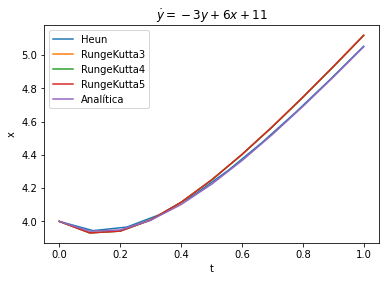

In [60]:
# Prueba de los codigos 

def f(x,y):
    return -3*y+6*x+11

def asol(x):
    return np.exp(-3*x)+2*x+3

yasol = np.vectorize(asol) # vectoriza la solucion o sea vuelve la sol un vector

t1,y1=Heun(f,0,1,4,10)
t2,y2=rungekutta3(f,0,4,0.1,10)
t3,y3=rungekutta4(f,0,4,0.1,10)
t4,y4=rungekutta5(f,0,4,0.1,10)
plt.plot( t1, y1, label='Heun')
plt.plot(t2, y2, label='RungeKutta3')
plt.plot(t3, y3, label='RungeKutta4')
plt.plot(t4, y4, label='RungeKutta5')
plt.plot(t4, yasol(t4), label='Analítica')
plt.legend()
plt.title('$\dot{y}=-3y+6x+11$')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

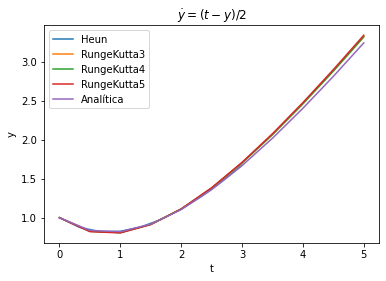

In [59]:
def f(t,y):
    return (t-y)/2

def asol(t):
    return t-2+3*math.exp(t*(-1/2))
yasol = np.vectorize(asol) # vectoriza la solucion o sea vuelve la sol un vector

t1,y1=Heun(f,0,3,1,10)
t2,y2=rungekutta3(f,0,1,0.5,10)
t3,y3=rungekutta4(f,0,1,0.5,10)
t4,y4=rungekutta5(f,0,1,0.5,10)
plt.plot( t1, y1, label='Heun')
plt.plot(t2, y2, label='RungeKutta3')
plt.plot(t3, y3, label='RungeKutta4')
plt.plot(t4, y4, label='RungeKutta5')
plt.plot(t4, yasol(t4), label='Analítica')
plt.legend()
plt.title('$\dot{y}=(t-y)/2$')
plt.xlabel('t')
plt.ylabel('y')
plt.show()


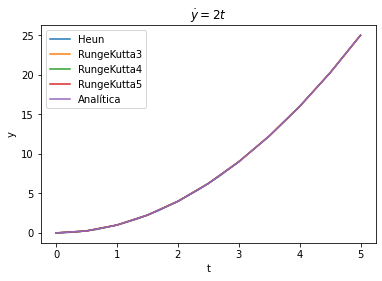

In [52]:
def f(t,y):
    return 2*t

def asol(t):
    return t**2
yasol = np.vectorize(asol) # vectoriza la solucion o sea vuelve la sol un vector

t1,y1=Heun(f,0,3,0,10)
t2,y2=rungekutta3(f,0,0,0.5,10)
t3,y3=rungekutta4(f,0,0,0.5,10)
t4,y4=rungekutta5(f,0,0,0.5,10)
plt.plot( t1, y1, label='Heun')
plt.plot(t2, y2, label='RungeKutta3')
plt.plot(t3, y3, label='RungeKutta4')
plt.plot(t4, y4, label='RungeKutta5')
plt.plot(t4, yasol(t4), label='Analítica')
plt.legend()
plt.title('$\dot{y}=2t$')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

#Runge Kutta de Fehlberg o RKF45

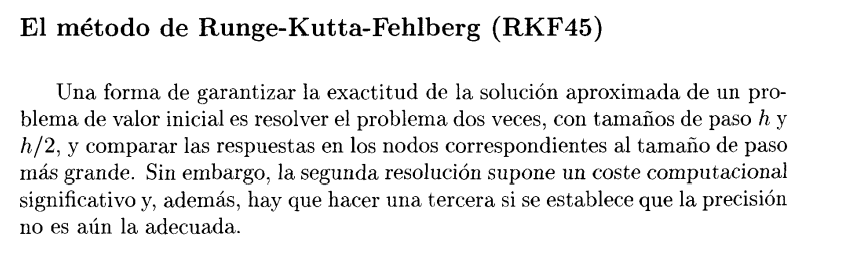

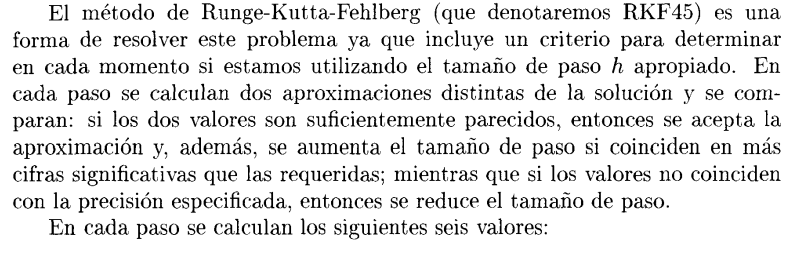

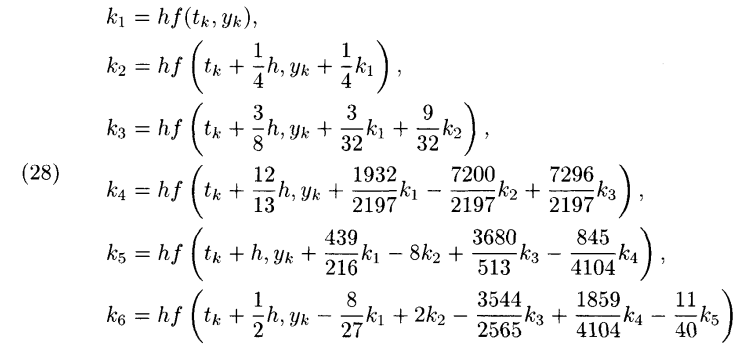

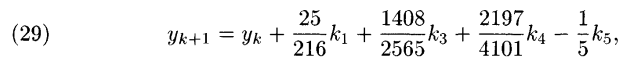

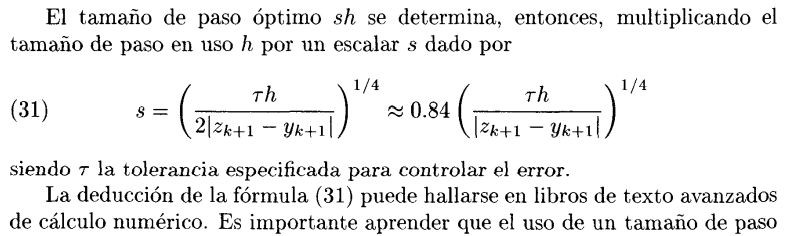

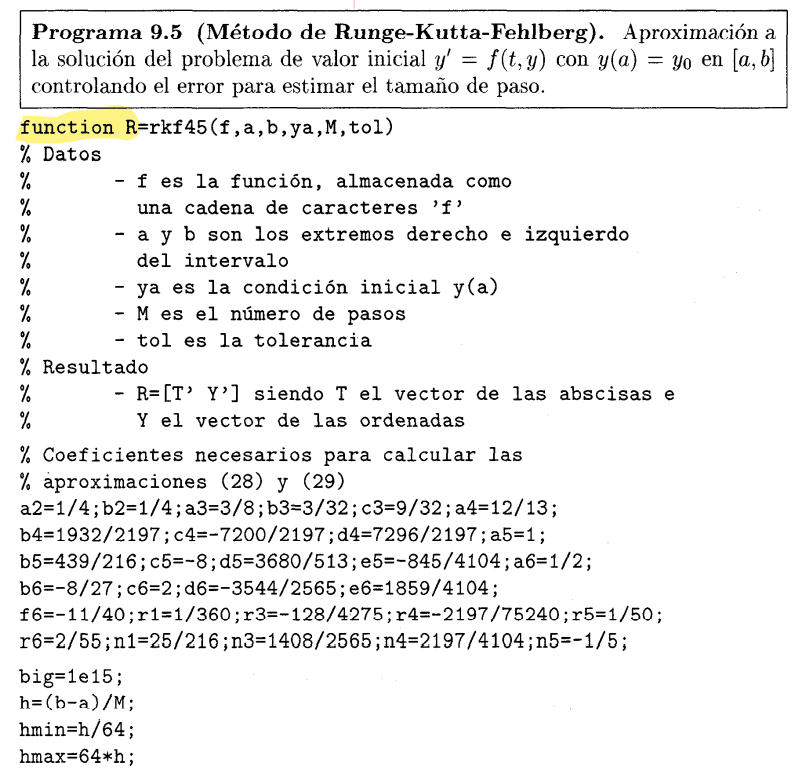
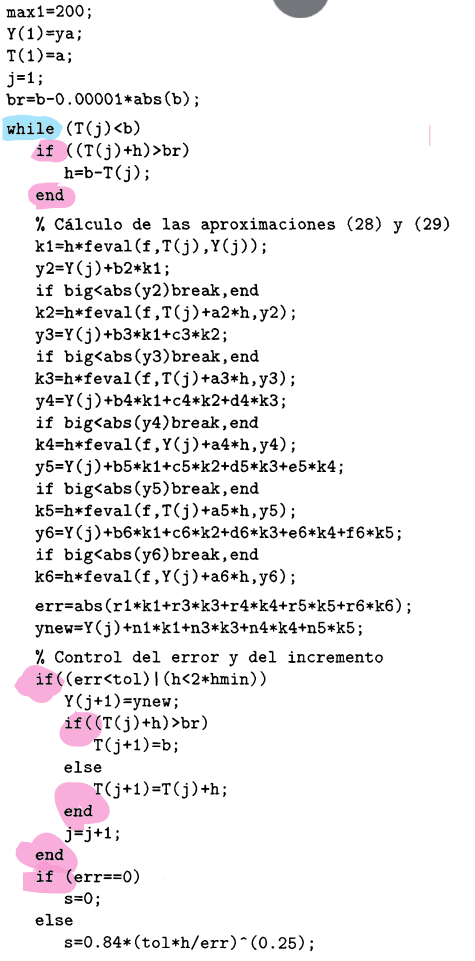

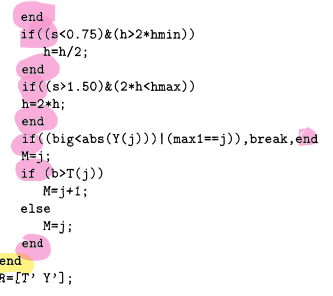





In [34]:
def rungekutta45(f,a,b,y0,M,tol):

  # f es la funcion
  # a y b son los extremos derecho e izquierdo del intervalo 
  # ya es la condición inicial y (a) 
  # M es el número de pasos 
  # tol es la tolerancia

  a2=1/4 ; b2=1/4 ; a3=3/8 ; b3=3/32 ; c3=9/32 ; a4=12/13 ; b4=1932/2197 ; c4=-7200/2197 ; d4=7296/2197 ; a5=1 ; b5=439/216 ; c5=-8 ; d5=3680/513 ; e5=-845/4104 ; a6=1/2 ; b6=-8/27 ; c6=2 ; d6=-3544/2565 ; e6=1859/4104 ; f6=-11/40 ; r1=1/360 ; r3=-128/4275 ; r4=-2197 /75240 ; r5=1/50 ; r6=2/55 ; n1=25/216; n3=1408/2565 ;n4=2197/4104 ; n5=-1/5;
  
  big=1E+15; 
  h=(b-a)/M;
  hmin=h/64;
  hmax=64*h;
  Y = np.zeros(shape=(M,1),dtype=float)
  T = np.zeros(shape=(M,1),dtype=float)
  max1=200
  Y[0]=y0;
  T[0]=a;
  j=0;
  br=b-0.00001*abs(b);

  while (T[j]<b):
    if ((T[j]+h)>br):
      h=b-T[j]
    
    K1 = h * f(T[j] , Y[j]) ; 
    y2 = Y[j] + b2*K1 ; 
    
    if big<abs (y2):break
    
    K2 = h * f(T[j] + a2*h , y2) ; 
    y3 = Y[j] + b3*K1 + c3*K2 ;
    
    if big<abs (y3):break

    K3 = h * f(T[j] + a3*h , y3) ; 
    y4 = Y[j] + b4*K1 + c4*K2 +d4*K3;
    
    if big<abs (y4):break
    
    K4 = h * f(Y[j] + a4*h , y4) ;
    y5 = Y[j] + b5*K1 + c5*K2 + d5*K3 +e5*K4;
    
    if big<abs (y5):break
    
    K5 = h * f(T[j] + a5*h , y5) ; 
    y6 = Y[j] + b6*K1 + c6*K2 + d6*K3 + e6*K4 + f6*K5; 
    
    if big<abs (y6):break
        
    K6 = h*f(Y[j] + a6*h , y6) ; 
    
    err=abs(r1*K1+r3*K3+r4*K4+r5*K5+r6*K6);
    ynew= Y[j] + n1*K1 + n3*K3 + n4*K4 + n5*K5 ;

    if ((err<tol) or (h<2*hmin)):
      Y[j+1]=ynew;
      
      if((T[j]+h)>br):
        T[j+1]=b;
      else:
        T[j+1]=T[j]+h;

      j=j+1

    if (err==0):
      s=0; 
    else:
      s=0.84*(tol*h/err)**0.25

    if((s<0.75) and (h>2*hmin)):
      h=h/2

    if ((s>1.5) and (2*h<hmax)):
      h=2*h

    if ((big<abs(Y[j])) or (max1==j)):break
    M=j;

    if (b>T[j]):
      M=j+1;
    else:
      M=j;

  return( T, Y)


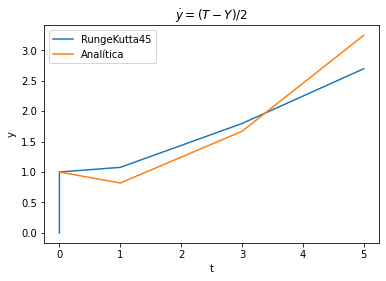

In [46]:
def f(t,y):
    return (t-y)/2

def asol(t):
    return t-2+3*math.exp(t*(-1/2))

yasol = np.vectorize(asol) # vectoriza la solucion o sea vuelve la sol un vector

t5,y5=rungekutta45(f,0,5,1,5,10E-3)
plt.plot(t5, y5, label='RungeKutta45')
plt.plot(t5, yasol(t5), label='Analítica')
plt.legend()
plt.title('$\dot{y}=(T-Y)/2$')
plt.xlabel('t')
plt.ylabel('y')
plt.show()
